![Pictures/bbc_news_logo.png](Pictures/bbc_news_logo.png)

# <span style='color:Red; font-weight:bold;'> BBC News </span>

### <span style='color:aqua; font-weight:bold;'> About Dataset </span>

<b>Context<b>

Self updating dataset. It collects RSS Feeds from BBC News using a Kernel: https://www.kaggle.com/gpreda/bbc-news-rss-feeds.
    The Kernel is run with a fixed frequency and the dataset is updated using the output of the Notebook.

<b>Contents<b>

    BBC News RSS Feeds. The data contains the following columns:

    *title
    *pubDate
    *guid
    *link
    *description


<b>Collection method<b>

    Uses requests_html and BeautifulSoup to collect RSS Feeds from BBC News site.

<b>Acknowledgements<b>

    The content is proprietary of BBC

<b>Inspiration<b>

    Use the data to analyze the sentiment of news, from title and description


### <span style='color:aqua; font-weight:bold;'> Import Packages and Load the data </span>

In [1]:
#Essentails
import numpy as np
import pandas as pd

#Visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
from wordcloud import WordCloud

#Modeling
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

In [2]:
news_df = pd.read_csv('bbc_news.csv')

# <span style='color:dodgerblue; font-weight:bold;'>Exploratory Data Analysis </span>

In [3]:
news_df.head() # First 5 rows

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [4]:
news_df.tail() # Last 5 rows

,title,pubDate,guid,link,description
37668,Finucane makes history with third medal in Paris,"Sun, 11 Aug 2024 11:24:03 GMT",https://www.bbc.com/sport/olympics/articles/ce...,https://www.bbc.com/sport/olympics/articles/ce...,Emma Finucane makes British Olympic history by...
37669,Family remember Alice at Southport funeral,"Sun, 11 Aug 2024 20:59:44 GMT",https://www.bbc.com/news/articles/cwyj8wz8157o#12,https://www.bbc.com/news/articles/cwyj8wz8157o,A final photo of Alice taken before the Taylor...
37670,'We will not allow hatred and mindless violenc...,"Sun, 11 Aug 2024 18:42:58 GMT",https://www.bbc.com/news/articles/c5y3w69vpgko#12,https://www.bbc.com/news/articles/c5y3w69vpgko,NI's chief constable condemns race hate attack...
37671,Unions to decide whether to call off bin strike,"Sun, 11 Aug 2024 17:51:07 GMT",https://www.bbc.com/news/articles/c39k0n7d2kgo#12,https://www.bbc.com/news/articles/c39k0n7d2kgo,Unions will meet on Monday to decide whether t...
37672,Welsh sixth-form uni applications lowest in UK,"Sun, 11 Aug 2024 21:00:08 GMT",https://www.bbc.com/news/articles/ckg2ngl23m0o#12,https://www.bbc.com/news/articles/ckg2ngl23m0o,A growing gap in applications between Wales an...


In [5]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37673 entries, 0 to 37672
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        37673 non-null  object
 1   pubDate      37673 non-null  object
 2   guid         37673 non-null  object
 3   link         37673 non-null  object
 4   description  37673 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


Convert 'pubDate' to datetime

In [17]:
news_df['pubDate'] = pd.to_datetime(news_df['pubDate'], errors='coerce')

In [6]:
news_df.isnull().sum()

title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64

In [7]:
news_df.describe()

,title,pubDate,guid,link,description
count,37673,37673,37673,37673,37673
unique,35486,36051,34860,33854,34676
top,Election poll tracker: How do the parties comp...,"Tue, 13 Jun 2023 10:25:22 GMT",https://www.bbc.co.uk/news/business-61634959,https://www.bbc.co.uk/news/business-61634959?a...,How closely have you been paying attention to ...
freq,34,10,63,61,80


make a plot how many news per day. =/80

In [8]:
# Check for duplicates across all columns
duplicated = news_df.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
news_df[duplicated]

Number of duplicated instances: 0


,title,pubDate,guid,link,description


### Word Clouds

In [9]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    all_stopwords = set(stopwords.words('english'))  # Load stopwords
    all_stopwords.remove('not')  # Remove 'not' from stopwords
    wordcloud = WordCloud(stopwords=all_stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="Black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

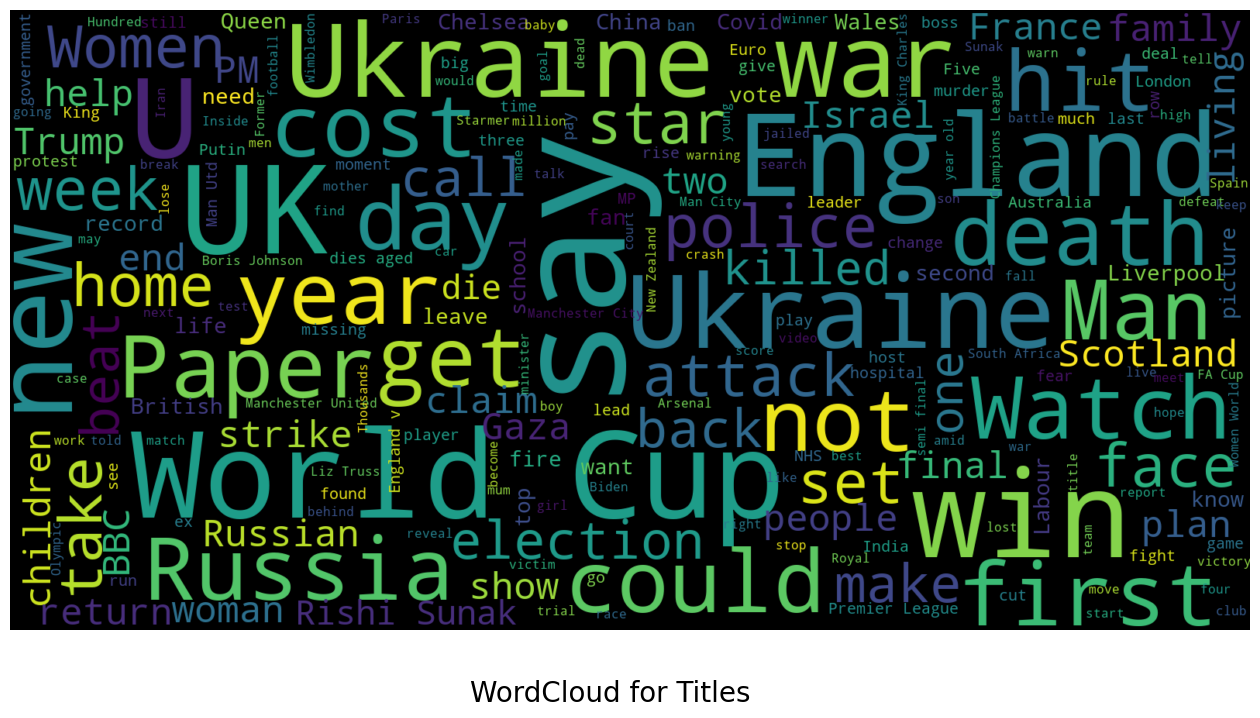

In [10]:
show_wordcloud(news_df['title'], title = 'WordCloud for Titles', mask = None)

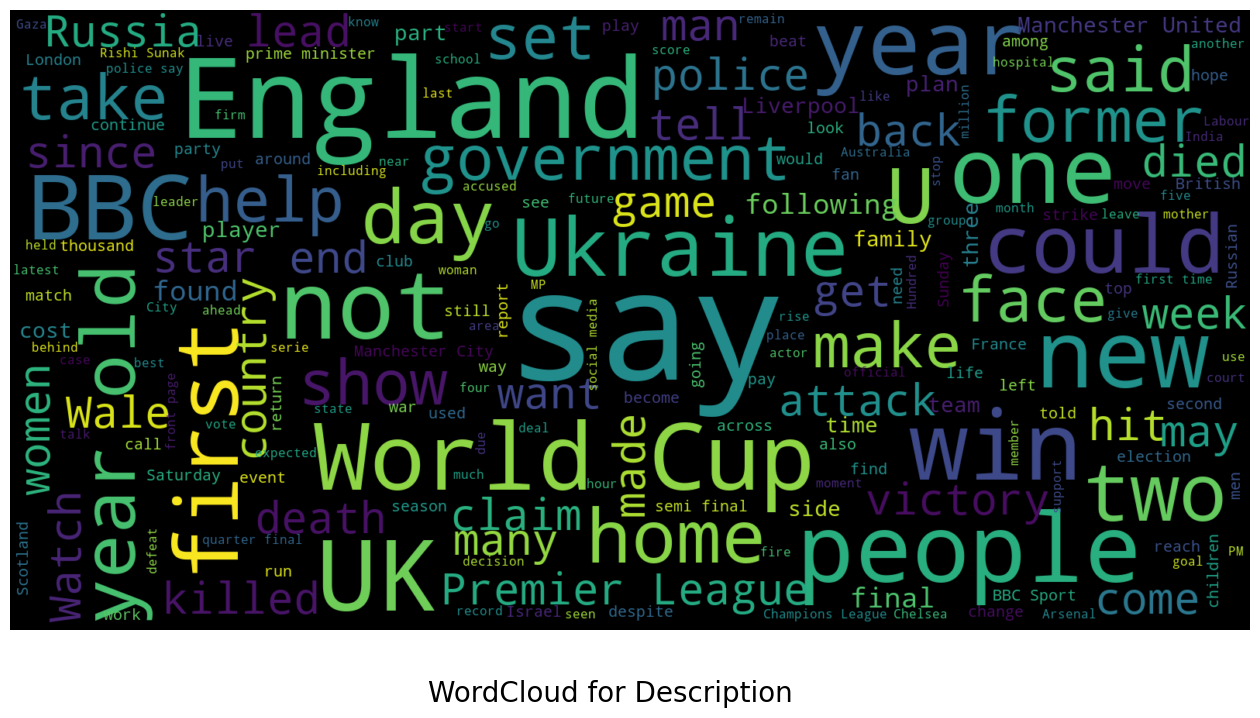

In [11]:
show_wordcloud(news_df['description'], title = 'WordCloud for Description', mask = None)

# <span style='color:dodgerblue; font-weight:bold;'>Data Cleaning</span> 

In [12]:
len(news_df)

37673

Sample before cleaning:

In [13]:
for i in range(3):
    print(f'[{i}]','Before Cleaning: ',news_df['title'][i])
    print(f'[{i}]','Before Cleaning: ',news_df['description'][i], '\n')

[0] Before Cleaning:  Ukraine: Angry Zelensky vows to punish Russian atrocities
[0] Before Cleaning:  The Ukrainian president says the country will not forgive or forget those who murder its civilians. 

[1] Before Cleaning:  War in Ukraine: Taking cover in a town under attack
[1] Before Cleaning:  Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee. 

[2] Before Cleaning:  Ukraine war 'catastrophic for global food'
[2] Before Cleaning:  One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies. 



In [14]:
def clean_text(news_df, columns_to_clean=['title', 'description']):
    # Create an empty DataFrame to store the cleaned values
    cleaned_data = {col: [] for col in columns_to_clean}
    
    ps = PorterStemmer()  # Initialize the Porter Stemmer
    all_stopwords = set(stopwords.words('english'))  # Load stopwords
    all_stopwords.remove('not')  # Remove 'not' from stopwords

    # Iterate through each row in the DataFrame
    for i in range(len(news_df)):
        for col in columns_to_clean:
            # Clean each title/description separately
            news = re.sub('[^a-zA-Z]', ' ', news_df[col][i])  # Change any non-letters to a space
            news = news.lower()  # Convert to lowercase
            news = news.split()  # Split the text into words

            # Remove stopwords and apply stemming
            news = [ps.stem(word) for word in news if word not in all_stopwords]
            
            # Join the cleaned words back into a single string
            cleaned_data[col].append(' '.join(news))

    # Return the cleaned data
    return cleaned_data

cleaned_data = clean_text(news_df)
news_df['title'] = cleaned_data['title']
news_df['description'] = cleaned_data['description']

Sample after cleaning:

In [15]:
for i in range(3):
    print(f'[{i}]','After Cleaning: ',news_df['title'][i])
    print(f'[{i}]','After Cleaning: ',news_df['description'][i], '\n')

[0] After Cleaning:  ukrain angri zelenski vow punish russian atroc
[0] After Cleaning:  ukrainian presid say countri not forgiv forget murder civilian 

[1] After Cleaning:  war ukrain take cover town attack
[1] After Cleaning:  jeremi bowen frontlin irpin resid came russian fire tri flee 

[2] After Cleaning:  ukrain war catastroph global food
[2] After Cleaning:  one world biggest fertilis firm say conflict could deliv shock food suppli 



# <span style='color:dodgerblue; font-weight:bold;'>Machine Learning</span> 

Preparing Data

In [16]:
"""sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"  """

'sia = SentimentIntensityAnalyzer()\ndef find_sentiment(post):\n    try:\n        if sia.polarity_scores(post)["compound"] > 0:\n            return "Positive"\n        elif sia.polarity_scores(post)["compound"] < 0:\n            return "Negative"\n        else:\n            return "Neutral"  \n    except:\n        return "Neutral"  '